In [ ]:
# Imports
import sys
import math
import time
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(170786)

In [ ]:
# Wrap to periodic boundaries
def wrap(r, L):
    r = np.array(r)
    for i in range(len(r)):
        if r[i] >= L:
            r[i] = r[i] - L
        if r[i] < 0:
            r[i] = r[i] + L
    return r
# take into account if particle moves >2L

In [ ]:
#Minimum image distance
def dist(r1, r2, L):
    r2 = np.array(r2)
    for i in range(3):
        if r2[i] - r1[i] > L/2:
            r2[i] = r2[i] - L
        if r1[i] - r2[i] > L/2:
            r2[i] = r2[i] + L
        if r2[i] == r1[i]:
            continue
    r = r2 - r1
    r = r - np.rint(r / L) * L  # Apply periodic boundary conditions
    return float(np.sqrt(np.dot(r, r)))
# def dist(r1, r2, L):
#     r = r2 - r1
#     r = r - np.rint(r / L) * L  # Apply periodic boundary conditions
#     return np.sqrt(np.dot(r, r))


In [ ]:
# Pairwise Energy
def E_ij(s, sigma, epsilon):
    return 4*epsilon*((sigma/s)**12-(sigma/s)**6)

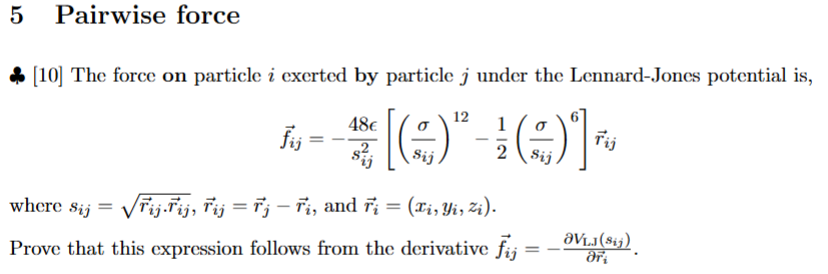

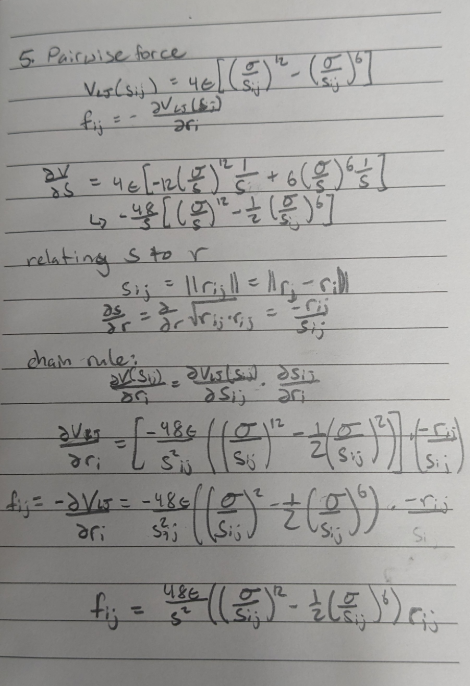

In [ ]:
# Pairwise Force
def f_ij(r, sigma, epsilon):
    r = np.array(r)
    s = np.sqrt(np.dot(r, r))
    force = (-48/s**2)*((sigma/s)**12-1/2*(sigma/s)**6)*r
    return force

In [ ]:
# Initialization - Random
def init_rand(N, L, sigma):
    xyz = []
    for i in range(N):
        rand = np.random.uniform(0, L, 3)
        xyz.append(rand)
        for j in range(1, i , 1):
            if dist(xyz[i], xyz[j], L) < sigma:
                xyz[j] = np.random.uniform(low = 0, high = L, size = 3)
                j -= 1
    return np.array(xyz)

In [ ]:
# Initialization - Crystal
def init_xtal(N, L):
    parts_per_side = int(np.ceil(N**(1/3)))
    spacing = L / parts_per_side
    xyz = []  # Start with an empty list
    for i in range(parts_per_side):
        for j in range(parts_per_side):
            for k in range(parts_per_side):
                if len(xyz) < N:  # Only add particles until we reach N
                    xyz.append([i * spacing, j * spacing, k * spacing])
    return np.array(xyz)  # Convert to NumPy array at the end


In [ ]:
# Total Energy for a single particle trial move
def E_i(r, i, xyz, L, sigma, epsilon):
    delta_energy = 0.0
    
    for j, coord in enumerate(xyz):
        if j == i:
            continue  # Skip self-interaction
        # Calculate the old and new distances
        d_old = dist(xyz[i], coord, L)  
        d_new = dist(r, coord, L)     
        
        # Calculate the energy contributions
        delta_energy += E_ij(d_new, sigma, epsilon) - E_ij(d_old, sigma, epsilon)
    
    return delta_energy


#System Energy (Total potential energy of the system)
def E_system(xyz, L, sigma, epsilon):
    total_energy = 0
    N = len(xyz)  # Number of particles
    for i in range(N):
        for j in range(i + 1, N):  # Avoid double-counting by starting at i+1
            d = dist(xyz[i], xyz[j], L)  # Minimum image distance
            total_energy += E_ij(d, sigma, epsilon)  # Pairwise energy
    return total_energy


In [ ]:
# Visualization
def plot_config(xyz, L):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red')
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.set_zlim([0, L])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [ ]:
# Coordinate Write
def xyzWrite(xyz, outfile, writestyle):
    N = len(xyz)  # Number of particles
    conversion_factor = 10.0  # Convert nm to Angstroms (1 nm = 10 Å)
    
    # Open the file in the specified mode
    with open(outfile, writestyle) as f:
        f.write(f"{N}\n")  # Write the number of atoms
        f.write("Generated by Molecular Simulation\n")  # Comment line
        
        # Write each particle's type and coordinates
        for i in range(N):
            x, y, z = xyz[i] * conversion_factor  # Convert coordinates to Å
            f.write(f"Ar {x:.2f} {y:.2f} {z:.2f}\n")



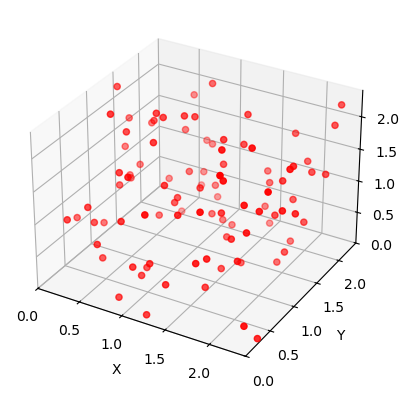

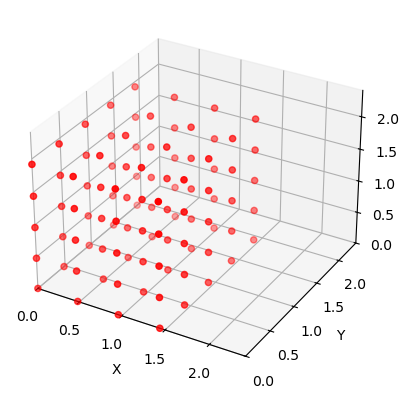

i = 0, j = 1
dij = 0.480000 nm
Eij = -0.728331 zJ
rij (nm):
[0.   0.   0.48]
fij (zJ/nm):
[0.         0.         4.71999452]
Ei = 0.000000 zJ
E = -276.485330 zJ


In [131]:
# Execution
N = 100
L = 2.4
sigma = 0.34
epsilon = 1.65

xyz = init_rand(N,L,sigma)
plot_config(xyz, L)

xyz = init_xtal(N,L)
plot_config(xyz, L)

i=0
j=1
print('i = %d, j = %d' % (i,j))

dij = dist(xyz[i,:], xyz[j,:], L)
print('dij = %f nm' % dij)

Eij = E_ij(dij, sigma, epsilon)
print('Eij = %f zJ' % Eij)

rij = xyz[j,:] - xyz[i,:]
print('rij (nm):')
print(rij)

fij = f_ij(rij,sigma,epsilon)
print('fij (zJ/nm):')
print(fij)

Ei = E_i(xyz[i,:],i,xyz,L,sigma,epsilon)
print('Ei = %f zJ' % Ei)

E = E_system(xyz, L, sigma, epsilon)
print('E = %f zJ' % E)

outfile = "output.xyz"
xyzWrite(xyz, outfile, 'w')